# ECE 143: Individual Project

### All import statements for the project

In [28]:
# import Python Libraries for the Individual Project
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random 
import warnings

### All code for the project
1. Object: MyClass instance
    * Object.length - length of map
    * Object.width - width of map
    * Object.map - map
    * Object.tower - number of towers on map
    * Object.trial - number of trials
    * Object.totalArea - total area of map
    * Object.currentArea - current area of map
    * Object.colorList - list of colors for rectangles
2. Methods: 
    * init (length, width) - initialize map
    * add (startLength, startWidth, endLength, endWidth) - add rectangle to map
    * displayMap () - display map
    * getNumTowers () - get number of towers on map
    * getNumTrials () - get number of trials
    * getTotalArea () - get total area on map
    * getCurrentArea () - get current area on map
3. Note
    * Relevant assert statements, docstrings for methods, comments, and
      concise / modular code included

In [24]:
class MyClass(object):

    # MyClass object (self) contains several relevant fields as listed below:
    #
    # self.length - length of the desired coverage footprint
    # self.width - width of the desired coverage footprint 
    # self.map - desired coverage footprint 
    # self.tower - number of towers on the desired coverage footprint
    # self.trial - number of trials on the desired coverage footprint
    # self.totalArea - total area of the desired coverage footprint
    # self.currentArea - currentarea of the desired coverage footprint
    # self.colorList - a list of colors used for the desired coverage footprint
    
    def __init__(self, length, width):
        '''
        Given `self`, which is a MyClass object, `length`, which is the length of 
        the desired coverage footprint, and `width`, which is the width of the 
        desired coverage footprint, the init method initializes the desired 
        coverage footprint with the given dimension to the MyClass object. 
    
        :param length: length of the desired coverage footprint
        :type length: int
        :param width: width of the desired coverage footprint
        :type length: int
        :returns: none
        '''
        # relevant assert statements 
        assert isinstance(length, int), 'Invalid input: parameter length is not type int'
        assert isinstance(width, int), 'Invalid input: parameter width is not type int'
        assert length > 0, 'Invalid input: paramater length is not a positive integer'
        assert width > 0, 'Invalid input: paramater width is not a positive integer'
        # set relavant fields for MyClass object
        self.length = length
        self.width = width
        self.map = np.zeros((self.length , self.width)).astype(int)
        self.tower = self.trial = self.currentArea = 0
        self.totalArea = length * width
        colorList = []
        numColors = 100
        for i in range(numColors):
            colorList.append('%06X' % random.randint(0, 0xFFFFFF))
            colorList[i] = '#' + colorList[i]
        self.colorList = colorList 
    
    def add(self, startLength, startWidth, endLength, endWidth):
        '''
        Given `self`, which is a MyClass object, `startlength`, which is the 
        start position of length for the desired coverage footprint, 
        `startwidth`, which is the start position of width for the desired 
        coverage footprint, `endlength`, which is the end position of length 
        for the desired coverage footprint, and `endwidth`, which is the end 
        position of width for the desired coverage footprint, the add method
        adds the rectangle with given specifications to the desired coverage 
        footprint of the MyClass object
    
        :param startLength: start position of length of the desired coverage footprint
        :type length: int
        :param startWidth: start position of width of the desired coverage footprint
        :type length: int
        :param endLength: end position of length of the desired coverage footprint
        :type length: int
        :param endWidth: end position of width of the desired coverage footprint
        :type length: int
        :returns: 
                    -1 if rectangle is not added to the desired coverage footprint
                    0  if the desired coverage footprint is fully occupied
                    1  if rectangle is added to the desired coverage footprint
        '''
        # relevant assert statements 
        assert isinstance(startLength, int), 'Invalid input: parameter startLength is not type int'
        assert isinstance(startWidth, int), 'Invalid input: parameter startWidth is not type int'
        assert isinstance(endLength, int), 'Invalid input: parameter endLength is not type int'
        assert isinstance(endWidth, int), 'Invalid input: parameter endWidth is not type int'
        assert startLength in range(0, endLength), 'Invalid input: paramater startLength is not in range'
        assert startWidth in range(0, endWidth), 'Invalid input: paramater startWidth is not in range'
        assert endLength in range(startLength + 1, self.length + 1), 'Invalid input: paramater endLength is not in range'
        assert endWidth in range(startWidth + 1, self.width + 1), 'Invalid input: paramater endWidth is not in range'
        # check if the desired coverage footprint is fully occupied
        if self.currentArea == self.totalArea: return 0 
        flag = False
        # add rectangle to the desired coverage footprint
        for i in range(startLength, endLength):
            for j in range(startWidth, endWidth):
                if self.map[i][j] == 0:
                    self.map[i][j] = self.tower + 1
                    flag = True
                    self.currentArea += 1
        self.trial += 1
        # check if rectangle is not added to the desired coverage footprint
        if flag == False: return -1  
        flag = False
        maxcount = bestI = bestJ = bestK = bestL = -1
        # find optimal tuple of (startLength, startWidth, endLength, endWidth) that gives maximum area
        for i in range(startLength, endLength):
            for j in range(startWidth, endWidth):
                count = 0
                for k in range(i, endLength):
                    for l in range(j, endWidth):
                        if self.map[k][l] == self.tower + 1: count += 1
                        else: 
                            flag = True 
                            break    
                        if count > maxcount: 
                            maxcount = count
                            (bestI, bestJ, bestK, bestL) = (i, j, k, l)
                    if flag == True: break
        (xRange, yRange) =  (range(bestI, bestK + 1), range(bestJ, bestL + 1))
        # zero out areas outside of the rectangle to give the correct shape of the desired coverage footprint
        for i in range(startLength, endLength):
            for j in range(startWidth, endWidth):
                flag = i not in xRange or j not in yRange
                if self.map[i][j] == self.tower + 1 and flag == True: 
                    self.map[i][j] = 0
                    self.currentArea -= 1 
        self.tower += 1
        # return 1 since rectangle is added to the desired coverage footprint
        return 1
        
    def displayMap(self):
        '''
        Given `self`, which is a MyClass object, the displayMap method 
        displays the desired coverage footprint for the MyClass object. 
    
        :returns: none
        '''
        warnings.filterwarnings('ignore')
        figureSize = 5
        # set the figure and axis for the plot
        plt.figure(figsize = (figureSize, figureSize))
        plt.xlim((0, self.length))   
        plt.ylim((0, self.width))
        plt.xticks(np.arange(0, self.length + 1, 1.0))
        plt.yticks(np.arange(0, self.width + 1, 1.0))
        ax = plt.subplot()
        # add colors to rectangles one by one and then display the plot
        for i in range(1, self.tower + 1):
            for j in range(0, self.length):
                for k in range(0, self.width):
                    if self.map[j][k] == i:
                        rect = patches.Rectangle((j,k), 1, 1, alpha = 1, color = self.colorList[i])
                        ax.add_patch(rect)
                        plt.text(j + 0.5, k + 0.5, i,
                        horizontalalignment = 'center',
                        verticalalignment = 'center',
                        fontsize = 10)
        plt.show()
  
    def getNumTowers(self):
        '''
        Given `self`, which is a MyClass object, the getNumTowers method 
        returns the number of towers on the desired coverage footprint for the MyClass object. 
    
        :returns: number of towers on the desired coverage footprint for the MyClass object
        '''
        return self.tower
        
    def getNumTrials(self):
        '''
        Given `self`, which is a MyClass object, the getNumTrials method 
        returns the number of trials on the desired coverage footprint for the MyClass object. 
    
        :returns: number of trials on the desired coverage footprint for the MyClass object
        '''
        return self.trial
        
    def getTotalArea(self):
        '''
        Given `self`, which is a MyClass object, the getTotalArea method 
        returns the total area of the desired coverage footprint for the MyClass object. 
    
        :returns: total area of the desired coverage footprint for the MyClass object
        '''
        return self.totalArea

    def getCurrentArea(self):
        '''
        Given `self`, which is a MyClass object, the getCurrentArea method 
        returns the current area of the desired coverage footprint for the MyClass object. 
    
        :returns: current area of the desired coverage footprint for the MyClass object
        '''
        return self.currentArea


### Test Cases

#### Test Case 1 for init: negative inputs

In [38]:
xLim = -5
yLim = -3
net = MyClass(xLim, yLim)

AssertionError: Invalid input: paramater length is not a positive integer

#### Test Case 2 for init: non-integer inputs

In [5]:
xLim = 1
yLim = list()
net = MyClass(xLim, yLim)

AssertionError: Invalid input: parameter width is not type int

#### Test Case 1 for add: non-integer inputs

In [6]:
xLim = 5
yLim = 5
net = MyClass(xLim, yLim)
startLength = range(1,1)
startWidth = (1,1)
endLength = 4.0
endWidth = list()
value = net.add(startLength, startWidth, endLength, endWidth)    

AssertionError: Invalid input: parameter startLength is not type int

#### Test Case 2 for add: startLength >= endLength or startWidth >= endWidth

In [40]:
xLim = 5
yLim = 5
net = MyClass(xLim, yLim)
startLength = 4
startWidth = 3
endLength = 2
endWidth = 3
value = net.add(startLength, startWidth, endLength, endWidth) 
net.displayMap()


AssertionError: Invalid input: paramater startLength is not in range

#### Test Case 3 for add: Out of Bounds 

In [8]:
xLim = 6
yLim = 6
net = MyClass(xLim, yLim)
startLength = -1
startWidth = 0
endLength = 5
endWidth = 5
value = net.add(startLength, startWidth, endLength, endWidth) 
net.displayMap()

AssertionError: Invalid input: paramater startLength is not in range

#### (1) Given an overall desired coverage footprint and a sequence of n communications towers, what is the resulting resolved coverage?

    As shown, the code shows that the current area of map is 18 for 10 communication towers.
    Note: The numbers and colors show the type of color and tower numbers associated with the rectangles

Resulting resolved coverage: 18 for 10 communication towers


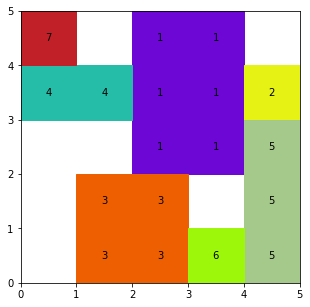

In [67]:
n = 10
xLim = yLim = 5
obj = MyClass(xLim, yLim)
for j in range(0, n):
    startLength = random.randint(0, xLim - 2)  
    startWidth = random.randint(0, yLim - 2) 
    endLength = random.randint(startLength + 1, xLim)  
    endWidth = random.randint(startWidth + 1, yLim)
    value = obj.add(startLength, startWidth, endLength, endWidth)    
    if value == 0: break
print ('Resulting resolved coverage: ' + str(obj.getCurrentArea()) + ' for ' + str(n) + ' communication towers')
obj.displayMap()

#### (2) What is the total area of coverage relative to the desired total coverage area of the original footprint? That is, are there any gaps in coverage?
    As shown, the code shows that the total area of coverage is 72% for 10 communication towers.
    Note: The numbers and colors show the type of color and tower numbers associated with the rectangles

Total area of coverage relative to desired total coverage area: 72.0%


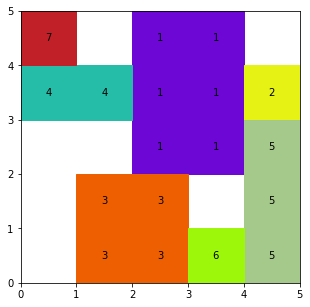

In [71]:
print ('Total area of coverage relative to desired total coverage area: ' + str(obj.getCurrentArea() * 100.0 / obj.getTotalArea()) + '%')
obj.displayMap()

#### (3) On average, how many communications towers are required before full coverage is obtained?
    As shown, the code shows across 10 experiments, it takes 15 communication towers until full coverage is reached.
    Note: The numbers and colors show the type of color and tower numbers associated with the rectangles

On average across 10 experiments, it takes 15.0 communication towers before full coverage is obtained


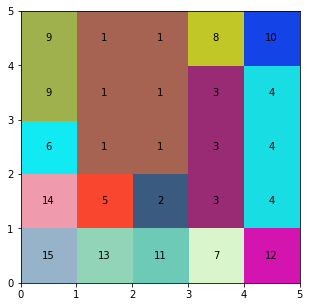

In [45]:
obj = MyClass(xLim, yLim)
numExperiment = 10
maxTrial = 100
aList = list([0] * (numExperiment))
currentSum = 0
# after this loop found numExperiment full maps
for i in range(0, numExperiment):
# after this loop we found one full map
    for j in range(0, maxTrial):
        startLength = random.randint(0, xLim - 2)  
        startWidth = random.randint(0, yLim - 2) 
        endLength = random.randint(startLength + 1, xLim)  
        endWidth = random.randint(startWidth + 1, yLim)
        value = obj.add(startLength, startWidth, endLength, endWidth)    
        if value == 0:
            currentSum += obj.tower
            break        
print ('On average across ' + str(numExperiment) + ' experiments, it takes ' + str(currentSum * 1.0/numExperiment) + ' communication towers before full coverage is obtained')
obj.displayMap()

#### (3) On average, how many communications towers are required before full coverage is obtained?
    As shown, the code shows across variable-valued number of experiments, I have printed out the number
    of experiments and average number of towers in each iteration. On the plot, it shows that, while 
    initially there are outliers, the law of large number dictates that, as the number of experiments get
    larger, the average number of towers would approach to some number, and evidently the variability
    in the average number of towers would also decrease as the number of experiments incerase. Thus, I can
    say that the number of experiments is inversely proportional to the variability of the average
    number towers across various iterations
    Note: The numbers and colors show the type of color and tower numbers associated with the rectangles

On average across 50 experiments, it takes 13.72 communication towers before full coverage is obtained


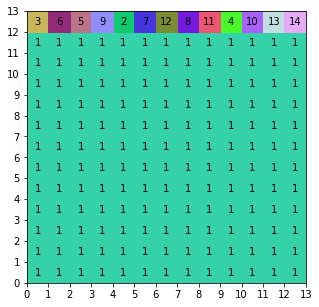

On average across 100 experiments, it takes 66.64 communication towers before full coverage is obtained


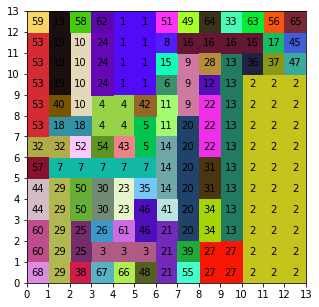

On average across 150 experiments, it takes 49.0 communication towers before full coverage is obtained


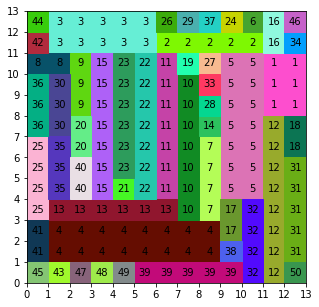

On average across 200 experiments, it takes 54.45 communication towers before full coverage is obtained


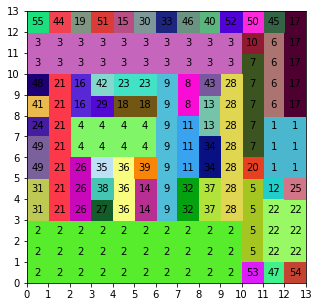

On average across 250 experiments, it takes 55.328 communication towers before full coverage is obtained


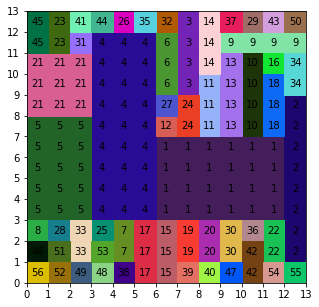

On average across 300 experiments, it takes 49.666666666666664 communication towers before full coverage is obtained


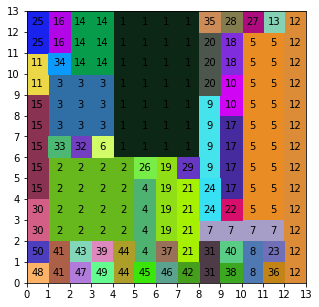

On average across 350 experiments, it takes 57.668571428571425 communication towers before full coverage is obtained


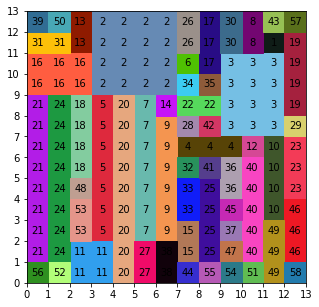

On average across 400 experiments, it takes 49.875 communication towers before full coverage is obtained


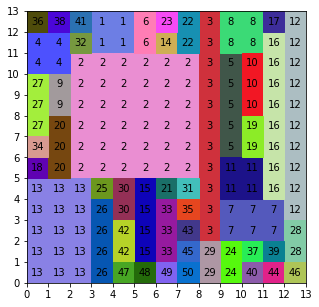

On average across 450 experiments, it takes 44.9 communication towers before full coverage is obtained


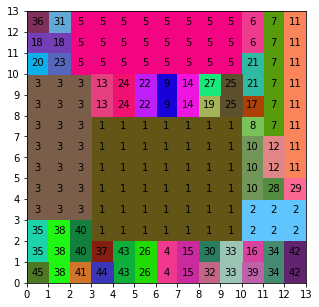

On average across 500 experiments, it takes 49.9 communication towers before full coverage is obtained


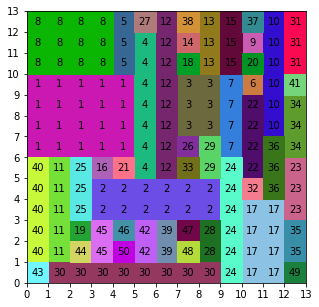

On average across 550 experiments, it takes 63.65090909090909 communication towers before full coverage is obtained


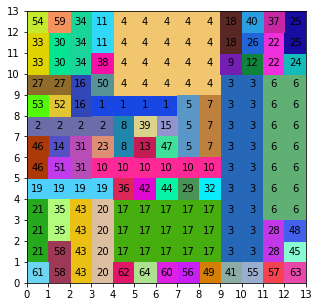

On average across 600 experiments, it takes 57.903333333333336 communication towers before full coverage is obtained


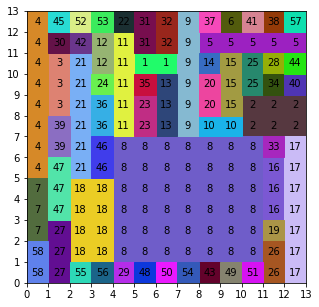

On average across 650 experiments, it takes 49.84615384615385 communication towers before full coverage is obtained


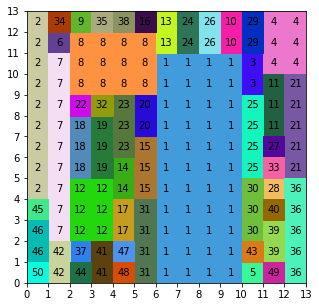

On average across 700 experiments, it takes 44.93571428571428 communication towers before full coverage is obtained


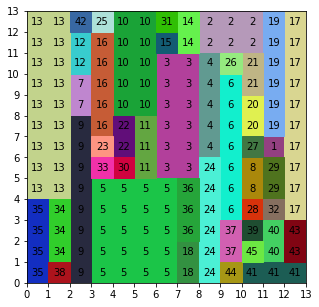

On average across 750 experiments, it takes 59.84 communication towers before full coverage is obtained


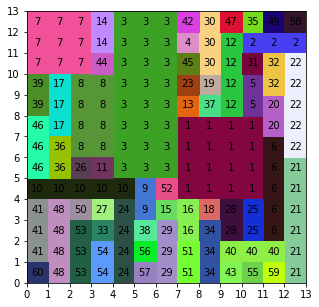

On average across 800 experiments, it takes 58.92625 communication towers before full coverage is obtained


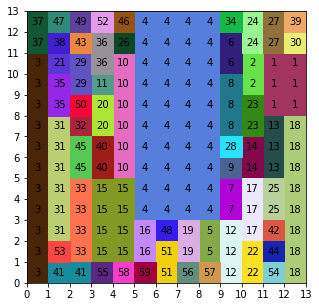

On average across 850 experiments, it takes 41.95058823529412 communication towers before full coverage is obtained


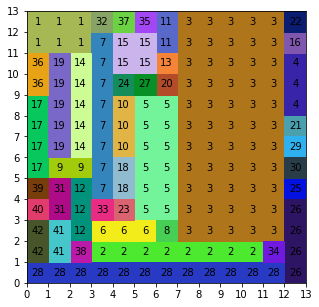

On average across 900 experiments, it takes 58.934444444444445 communication towers before full coverage is obtained


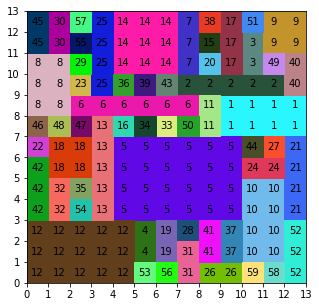

On average across 950 experiments, it takes 44.857894736842105 communication towers before full coverage is obtained


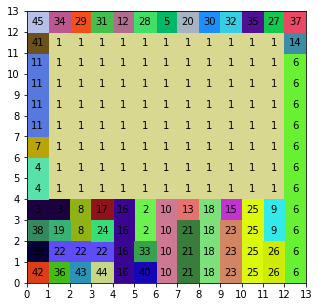

On average across 1000 experiments, it takes 64.87 communication towers before full coverage is obtained


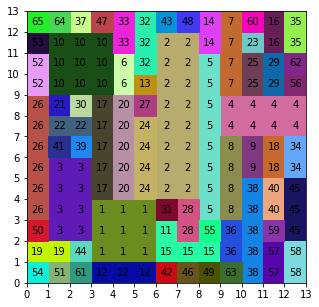

On average across 1050 experiments, it takes 56.89142857142857 communication towers before full coverage is obtained


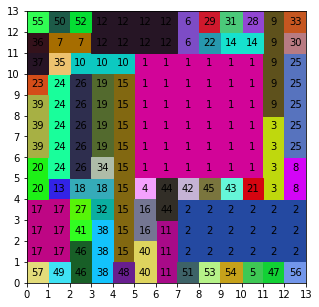

On average across 1100 experiments, it takes 61.661818181818184 communication towers before full coverage is obtained


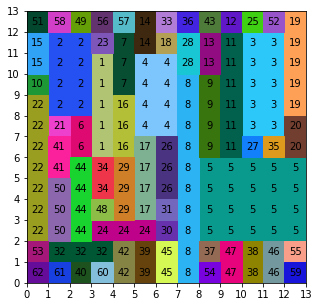

On average across 1150 experiments, it takes 50.955652173913045 communication towers before full coverage is obtained


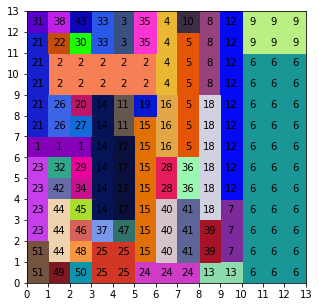

On average across 1200 experiments, it takes 61.94833333333333 communication towers before full coverage is obtained


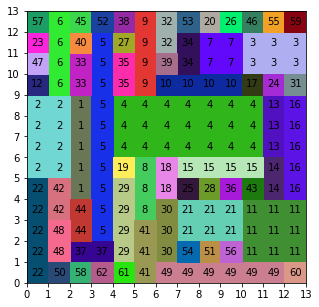

On average across 1250 experiments, it takes 49.96 communication towers before full coverage is obtained


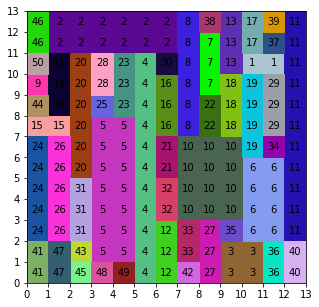

On average across 1300 experiments, it takes 41.0 communication towers before full coverage is obtained


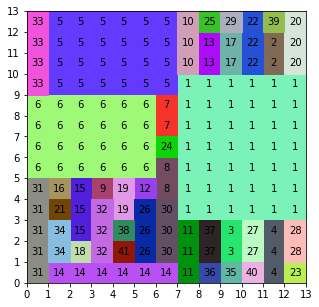

On average across 1350 experiments, it takes 61.90814814814815 communication towers before full coverage is obtained


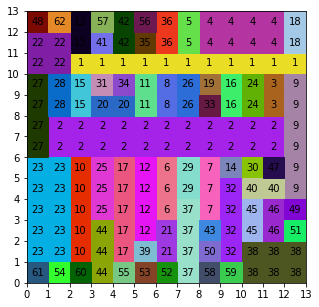

On average across 1400 experiments, it takes 61.955714285714286 communication towers before full coverage is obtained


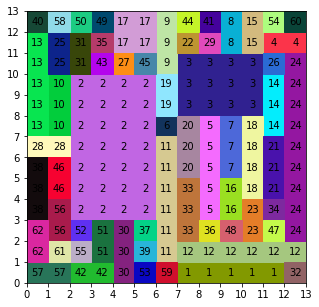

On average across 1450 experiments, it takes 49.93103448275862 communication towers before full coverage is obtained


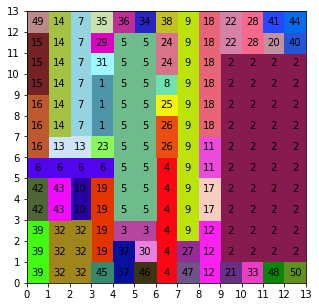

On average across 1500 experiments, it takes 54.96333333333333 communication towers before full coverage is obtained


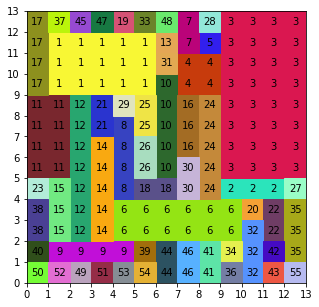

On average across 1550 experiments, it takes 45.97032258064516 communication towers before full coverage is obtained


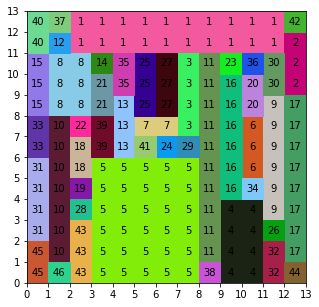

On average across 1600 experiments, it takes 52.966875 communication towers before full coverage is obtained


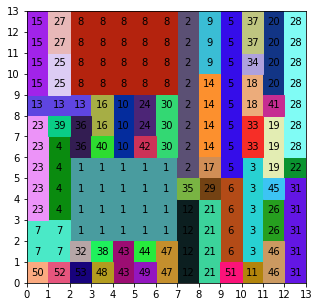

On average across 1650 experiments, it takes 50.0 communication towers before full coverage is obtained


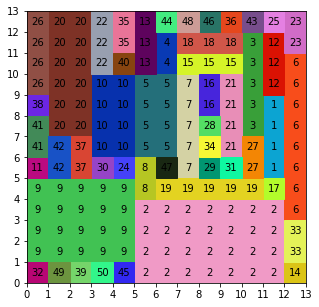

On average across 1700 experiments, it takes 64.88529411764706 communication towers before full coverage is obtained


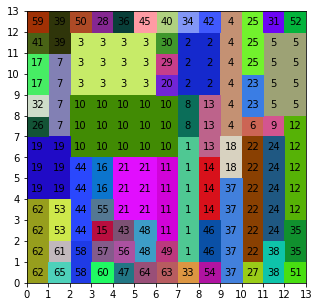

On average across 1750 experiments, it takes 45.97371428571429 communication towers before full coverage is obtained


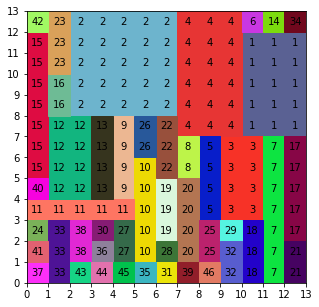

On average across 1800 experiments, it takes 51.913333333333334 communication towers before full coverage is obtained


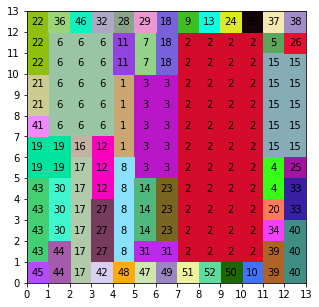

On average across 1850 experiments, it takes 55.93945945945946 communication towers before full coverage is obtained


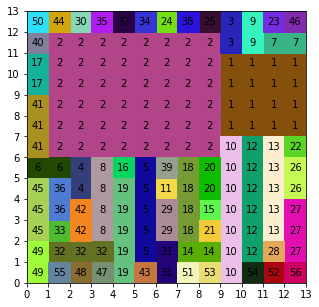

On average across 1900 experiments, it takes 41.86736842105263 communication towers before full coverage is obtained


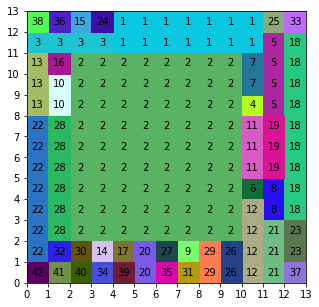

On average across 1950 experiments, it takes 70.85435897435897 communication towers before full coverage is obtained


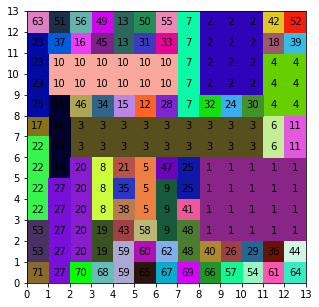

On average across 2000 experiments, it takes 35.982 communication towers before full coverage is obtained


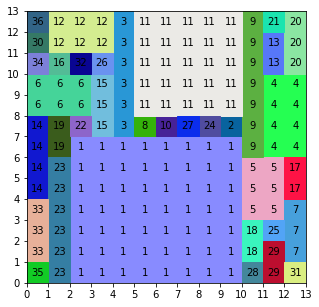

On average across 2050 experiments, it takes 27.986341463414636 communication towers before full coverage is obtained


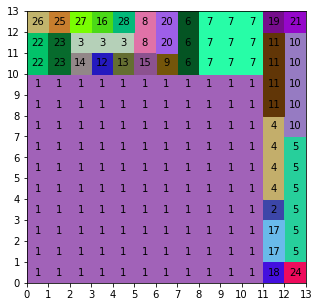

On average across 2100 experiments, it takes 41.98 communication towers before full coverage is obtained


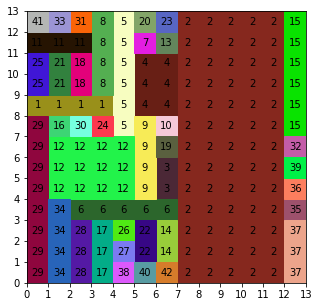

On average across 2150 experiments, it takes 62.912093023255814 communication towers before full coverage is obtained


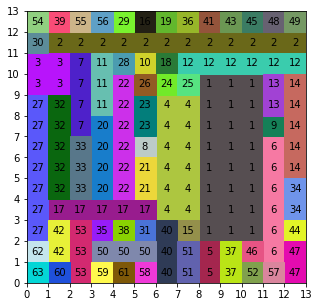

On average across 2200 experiments, it takes 37.982727272727274 communication towers before full coverage is obtained


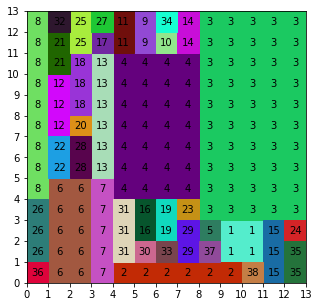

On average across 2250 experiments, it takes 65.97066666666667 communication towers before full coverage is obtained


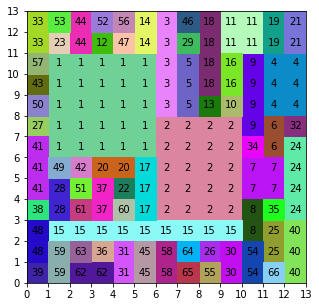

On average across 2300 experiments, it takes 61.81130434782609 communication towers before full coverage is obtained


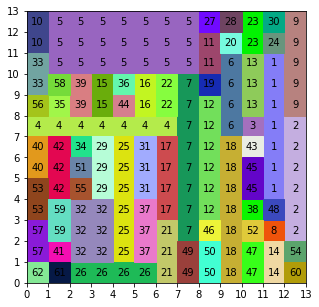

On average across 2350 experiments, it takes 58.92468085106383 communication towers before full coverage is obtained


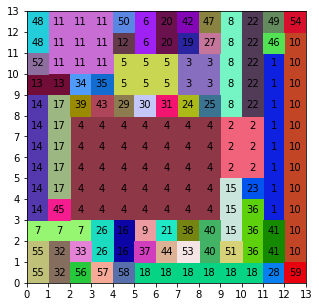

On average across 2400 experiments, it takes 34.985416666666666 communication towers before full coverage is obtained


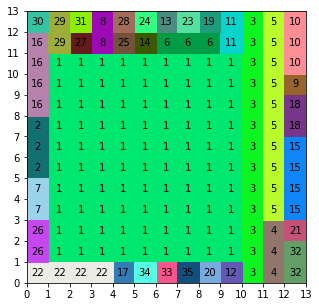

On average across 2450 experiments, it takes 55.97714285714286 communication towers before full coverage is obtained


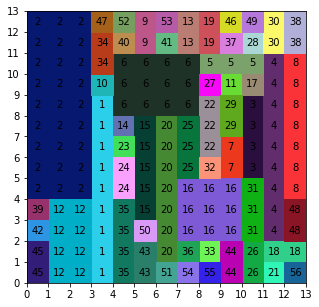

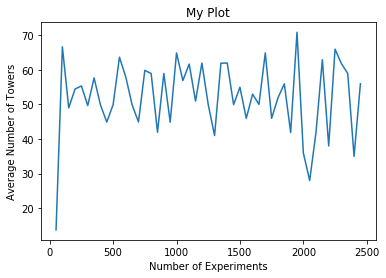

In [73]:
# define the length and width dimensions of map and number of iterations
xLim = yLim = 13
numIteration = 50
myList = list()
for i in range(1, numIteration):
    obj = MyClass(xLim, yLim)
    numExperiment = (50 * i)
    maxTrial = 100
    aList = list([0] * (numExperiment))
    currentSum = 0
    # after this loop found numExperiment full maps
    for i in range(0, numExperiment):
    # after this loop we found one full map
        for j in range(0, maxTrial):
            startLength = random.randint(0, xLim - 2)  
            startWidth = random.randint(0, yLim - 2) 
            endLength = random.randint(startLength + 1, xLim)  
            endWidth = random.randint(startWidth + 1, yLim)
            value = obj.add(startLength, startWidth, endLength, endWidth)    
            if value == 0:
                currentSum += obj.tower
                break     
    # put (# experiment, avg # of towers) tuples in myList
    myTuple = (numExperiment, currentSum * 1.0/numExperiment)
    myList.append(myTuple)
    print ('On average across ' + str(numExperiment) + ' experiments, it takes ' + str(currentSum * 1.0/numExperiment) + ' communication towers before full coverage is obtained')
    obj.displayMap()
plt.plot(*zip(*myList))
plt.title('My Plot')
plt.xlabel('Number of Experiments')
plt.ylabel('Average Number of Towers')
plt.show()